In [1]:
#Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Testing libraries
from scikitplot.metrics import plot_roc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

#Random seed
seed = 1234

#%matplotlib inline

from utils import get_image

In [12]:
arm = get_image('W1-50_threshold_3sig.fits', False, False)

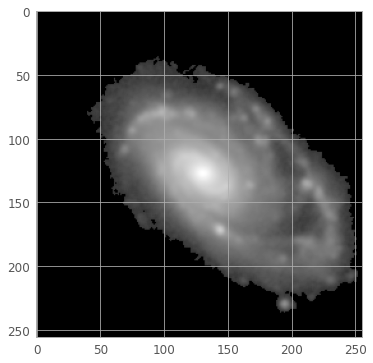

In [14]:
plt.imshow(np.log(0.05 + arm), cmap = 'gray')

### ROC

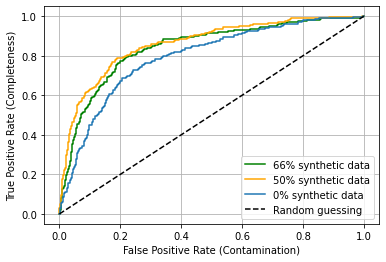

In [6]:
#Get mean predictions.
single_pred = np.array(pd.read_csv('predictions/single_optimal_predictions_500.csv'))
configB_pred = np.array(pd.read_csv('predictions/ensembleB_CV_predictions_500.csv'))
configA_pred = np.array(pd.read_csv('predictions/ensembleA_CV_predictions_500.csv'))

#Get labels.
labels = np.array(pd.read_csv('predictions/ensembleB_CV_labels.csv'))

fprS, tprS, _ = roc_curve(labels, single_pred)
fprA, tprA, _ = roc_curve(labels, configA_pred)
fprB, tprB, _ = roc_curve(labels, configB_pred)

aucS = auc(fprS, tprS)
aucA = auc(fprA, tprA)
aucB = auc(fprB, tprB)
#Random guessing.
x = np.linspace(0,1,100)

#Plot ROC Curve.
plt.plot(fprA,tprA, label = '66% synthetic data', c = 'green')
plt.plot(fprB,tprB, label = '50% synthetic data', c = 'orange')
plt.plot(fprS,tprS, label = '0% synthetic data')
plt.plot(x,x, 'k--', label = 'Random guessing')
plt.ylabel('True Positive Rate (Completeness)')
plt.xlabel('False Positive Rate (Contamination)')
plt.legend()
plt.grid()
plt.savefig('plots/ROC_fake.pdf')
plt.show();

In [7]:
aucS, aucA,aucB

(0.7924980327480085, 0.8409894469057552, 0.8604679364874042)

### Accuracy

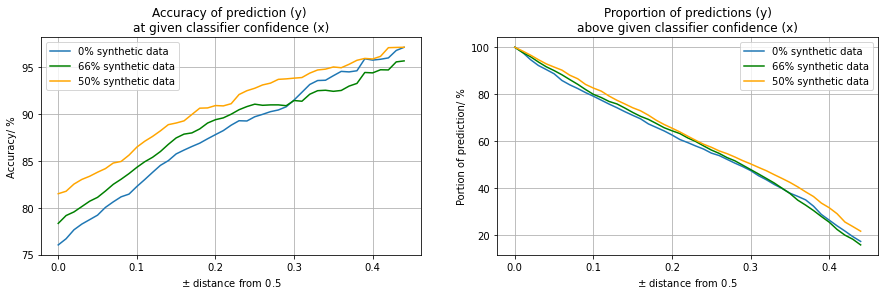

In [20]:
def acc(CONF, display = False):
    assert CONF < 0.5, 'CONF too high.'
    
    allData = [single_pred, configA_pred, configB_pred]
    stats = []
    
    if display:
        print('\nConfidence +/- {}'.format(CONF))
    
    for n in range (len(allData)):
        data = allData[n]
        
        if n == 0:
            data_name = 'Single Model'
        elif n == 1:
            data_name = 'Config A'
        else:
            data_name = 'Config B'
            
        nb_corr = 0
        nb_conf = 0

        for i in range(len(labels)):
            if data[i] > 0.5 + CONF:
                nb_conf += 1
                if labels[i] == 1:
                    nb_corr += 1
            if data[i] < 0.5 - CONF:
                nb_conf += 1
                if labels[i] == 0:
                    nb_corr += 1

        #Compute stats
        accuracy = nb_corr*100/nb_conf
        p_interval = nb_conf*100/len(labels)
                                     
        stats.append([accuracy, p_interval]) 
        
        if display:
            print('\n' + data_name)
            print('Accuracy = {:.2f}%'.format(accuracy))
            print('Proportion in interval = {:.2f}%'.format(p_interval))
    if display:
        print('---------------------------------------')
        
    return stats


#Accuracy plots by interval
nb_points = 45

single_acc = np.zeros((nb_points, 2))
configA_acc = np.zeros((nb_points, 2))
configB_acc = np.zeros((nb_points, 2))
x = np.zeros(nb_points)

for i in range (nb_points):
    single_acc[i] = acc(i/100)[0]
    configA_acc[i] = acc(i/100)[1]
    configB_acc[i] = acc(i/100)[2]
    
    x[i] = i/100

fig, ax = plt.subplots(1,2)

fig.set_figwidth(15)
ax[0].plot(x, single_acc[:,0], label = '0% synthetic data')
ax[0].plot(x, configA_acc[:,0], label = '66% synthetic data', c  = 'green')
ax[0].plot(x, configB_acc[:,0], label = '50% synthetic data', c = 'orange')
ax[0].set_ylabel('Accuracy/ %')
ax[0].set_xlabel('$\pm$ distance from 0.5')
ax[0].set_title('Accuracy of prediction (y) \nat given classifier confidence (x)')
ax[0].grid()
ax[0].legend()

ax[1].plot(x, single_acc[:,1], label = '0% synthetic data')
ax[1].plot(x, configA_acc[:,1], label = '66% synthetic data', c = 'green')
ax[1].plot(x, configB_acc[:,1], label = '50% synthetic data', c = 'orange')
ax[1].set_ylabel('Portion of prediction/ %')
ax[1].set_xlabel('$\pm$ distance from 0.5')
ax[1].set_title('Proportion of predictions (y)\nabove given classifier confidence (x)')
ax[1].grid()
ax[1].legend()

plt.savefig('plots/acc_vs_conf_fake.png')
plt.show()

In [4]:
for i in range (5):
    acc(i/10, True)


Confidence +/- 0.0

Single Model
Accuracy = 75.08%
Proportion in interval = 100.00%

Config A
Accuracy = 80.23%
Proportion in interval = 100.00%

Config B
Accuracy = 81.44%
Proportion in interval = 100.00%
---------------------------------------

Confidence +/- 0.1

Single Model
Accuracy = 79.42%
Proportion in interval = 78.45%

Config A
Accuracy = 84.59%
Proportion in interval = 81.25%

Config B
Accuracy = 87.43%
Proportion in interval = 80.42%
---------------------------------------

Confidence +/- 0.2

Single Model
Accuracy = 82.73%
Proportion in interval = 59.25%

Config A
Accuracy = 88.85%
Proportion in interval = 61.03%

Config B
Accuracy = 90.57%
Proportion in interval = 62.68%
---------------------------------------

Confidence +/- 0.3

Single Model
Accuracy = 85.87%
Proportion in interval = 40.05%

Config A
Accuracy = 90.42%
Proportion in interval = 39.80%

Config B
Accuracy = 93.97%
Proportion in interval = 44.25%
---------------------------------------

Confidence +/- 0.4



In [52]:
acc(0.33, True)


Confidence +/- 0.33

Single Model
Accuracy = 86.86%
Proportion in interval = 33.38%

Config A
Accuracy = 91.38%
Proportion in interval = 33.18%

Config B
Accuracy = 94.47%
Proportion in interval = 39.10%
---------------------------------------


[[86.85714285714286, 33.375715193897015],
 [91.37931034482759, 33.18499682136046],
 [94.47154471544715, 39.09726636999364]]